In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import r2_score
import seaborn as sns
import os


os.getcwd()

'c:\\Users\\alexa\\OneDrive\\Documents\\UNIVERSITE\\Master2_MIA\\supervisé\\compétition\\code'

Dans ce fichier nous allons analysé les variables des jeux de données train et test et appliqué les première transformations sur les variables


In [58]:
data_train = pd.read_parquet('.\\data\\train.parquet',engine='pyarrow')
data_test = pd.read_parquet('.\\data\\test.parquet',engine='pyarrow')

In [59]:
data_train.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon
count,100000.000000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.759540,2024-01-17 01:37:59.341700,2024-01-17 01:53:39.024740,1.335090,3.213008,1.998210,1.186610,18.044264,1.538507,0.497315,3.430985,0.525877,0.999882,2.335125,0.140857,40.752187,-73.965628,40.754760,-73.971940
min,1.000000,2023-12-31 23:56:46,2024-01-01 00:03:50,0.000000,0.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.576961,-74.174002,40.528686,-74.187679
25%,2.000000,2024-01-09 15:34:38,2024-01-09 15:50:20.750000,1.000000,1.000000,1.000000,1.000000,8.600000,0.000000,0.500000,1.000000,0.000000,1.000000,2.500000,0.000000,40.740439,-73.989845,40.740337,-73.989845
50%,2.000000,2024-01-17 11:32:54.500000,2024-01-17 11:51:50,1.000000,1.690000,1.000000,1.000000,12.800000,1.000000,0.500000,2.800000,0.000000,1.000000,2.500000,0.000000,40.758028,-73.977698,40.758028,-73.977698
75%,2.000000,2024-01-24 18:09:36,2024-01-24 18:28:48.500000,1.000000,3.100000,1.000000,1.000000,19.800000,2.500000,0.500000,4.200000,0.000000,1.000000,2.500000,0.000000,40.773633,-73.965146,40.773633,-73.961764
max,2.000000,2024-01-31 23:59:07,2024-02-01 10:57:24,7.000000,53.640000,99.000000,4.000000,214.800000,11.750000,0.500000,99.000000,49.260000,1.000000,2.500000,1.750000,40.899528,-73.726655,40.899528,-73.711025
std,0.427365,NaN,NaN,0.847745,4.219928,9.594546,0.458398,15.839824,1.788004,0.036542,3.686474,2.020583,0.009412,0.620490,0.476090,0.032148,0.048564,0.031182,0.036295


In [60]:
data_test.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon
count,2.627163e+06,2627163,2627163,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06
mean,1.759324e+00,2024-01-17 01:43:13.110949,2024-01-17 01:58:52.406439,1.339094e+00,3.224451e+00,2.021085e+00,1.185402e+00,1.808981e+01,1.550850e+00,4.974680e-01,5.239940e-01,9.999077e-01,2.333000e+00,1.425405e-01,4.075211e+01,-7.396549e+01,4.075476e+01,-7.397195e+01
min,1.000000e+00,2002-12-31 22:59:39,2002-12-31 23:05:41,0.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,0.000000e+00,-2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.055913e+01,-7.417400e+01,4.052549e+01,-7.423354e+01
25%,2.000000e+00,2024-01-09 15:58:07,2024-01-09 16:15:23.500000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,0.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00,4.074044e+01,-7.398984e+01,4.074034e+01,-7.398984e+01
50%,2.000000e+00,2024-01-17 10:57:04,2024-01-17 11:15:51,1.000000e+00,1.690000e+00,1.000000e+00,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,0.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00,4.075803e+01,-7.397770e+01,4.075803e+01,-7.397770e+01
75%,2.000000e+00,2024-01-24 18:54:06,2024-01-24 19:08:48,1.000000e+00,3.100000e+00,1.000000e+00,1.000000e+00,1.980000e+01,2.500000e+00,5.000000e-01,0.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00,4.077363e+01,-7.396515e+01,4.077363e+01,-7.396176e+01
max,2.000000e+00,2024-02-01 00:01:15,2024-02-01 22:04:34,9.000000e+00,8.000000e+01,9.900000e+01,4.000000e+00,8.200000e+02,1.425000e+01,4.000000e+00,9.546000e+01,1.000000e+00,2.500000e+00,1.750000e+00,4.089953e+01,-7.371103e+01,4.089953e+01,-7.371103e+01
std,4.274942e-01,NaN,NaN,8.508770e-01,4.231871e+00,9.710419e+00,4.562516e-01,1.594478e+01,1.799518e+00,3.578980e-02,2.017657e+00,8.301661e-03,6.241870e-01,4.786734e-01,3.210918e-02,4.874899e-02,3.124374e-02,3.619966e-02


il y a une date de 2002 ça na pas de sens, car le jeu de données suis les pourboires pour janvier 2024, on décide donc de changer la date en 2023 car il sagit du 31/12

In [61]:
def change_2002_en_2023(date):
    if date.year == 2002:
        return date.replace(year=2023)
    return date

In [62]:
data_test['tpep_pickup_datetime'] = data_test['tpep_pickup_datetime'].apply(change_2002_en_2023)
data_test['tpep_dropoff_datetime'] = data_test['tpep_dropoff_datetime'].apply(change_2002_en_2023)

In [63]:
data_test.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon
count,2.627163e+06,2627163,2627163,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06,2.627163e+06
mean,1.759324e+00,2024-01-17 01:47:25.355670528,2024-01-17 02:03:04.651160320,1.339094e+00,3.224451e+00,2.021085e+00,1.185402e+00,1.808981e+01,1.550850e+00,4.974680e-01,5.239940e-01,9.999077e-01,2.333000e+00,1.425405e-01,4.075211e+01,-7.396549e+01,4.075476e+01,-7.397195e+01
min,1.000000e+00,2023-12-31 22:59:39,2023-12-31 23:05:41,0.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,0.000000e+00,-2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.055913e+01,-7.417400e+01,4.052549e+01,-7.423354e+01
25%,2.000000e+00,2024-01-09 15:58:07,2024-01-09 16:15:23.500000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,0.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00,4.074044e+01,-7.398984e+01,4.074034e+01,-7.398984e+01
50%,2.000000e+00,2024-01-17 10:57:04,2024-01-17 11:15:51,1.000000e+00,1.690000e+00,1.000000e+00,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,0.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00,4.075803e+01,-7.397770e+01,4.075803e+01,-7.397770e+01
75%,2.000000e+00,2024-01-24 18:54:06,2024-01-24 19:08:48,1.000000e+00,3.100000e+00,1.000000e+00,1.000000e+00,1.980000e+01,2.500000e+00,5.000000e-01,0.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00,4.077363e+01,-7.396515e+01,4.077363e+01,-7.396176e+01
max,2.000000e+00,2024-02-01 00:01:15,2024-02-01 22:04:34,9.000000e+00,8.000000e+01,9.900000e+01,4.000000e+00,8.200000e+02,1.425000e+01,4.000000e+00,9.546000e+01,1.000000e+00,2.500000e+00,1.750000e+00,4.089953e+01,-7.371103e+01,4.089953e+01,-7.371103e+01
std,4.274942e-01,NaN,NaN,8.508770e-01,4.231871e+00,9.710419e+00,4.562516e-01,1.594478e+01,1.799518e+00,3.578980e-02,2.017657e+00,8.301661e-03,6.241870e-01,4.786734e-01,3.210918e-02,4.874899e-02,3.124374e-02,3.619966e-02


ajouter des colonnes Jour et moment de la journée

In [64]:
# Fonction pour déterminer si c'est un week-end ou un jour de semaine
def determine_jour(date):
    return date.weekday() 

# Fonction pour déterminer l'heure de la journée
def determine_heure(date):
    hour = date.hour
    if 5 <= hour < 12:
        return 'matin'  # 5h à 11h59
    elif 12 <= hour < 18:
        return 'après-midi'  # 12h à 17h59
    elif 18 <= hour < 22:
        return 'soirée'  # 18h à 21h59
    else:
        return 'nuit'  # 22h à 4h59
# Appliquer les fonction pour créer les nouvelle colonne 'Jour' et 'moment de la journée'

data_test['Jour'] = data_test['tpep_pickup_datetime'].apply(determine_jour).astype('category')
data_test['moment de la journée'] = data_test['tpep_pickup_datetime'].apply(determine_heure).astype('category')

data_train['Jour'] = data_train['tpep_pickup_datetime'].apply(determine_jour).astype('category')
data_train['moment de la journée'] = data_train['tpep_pickup_datetime'].apply(determine_heure).astype('category')


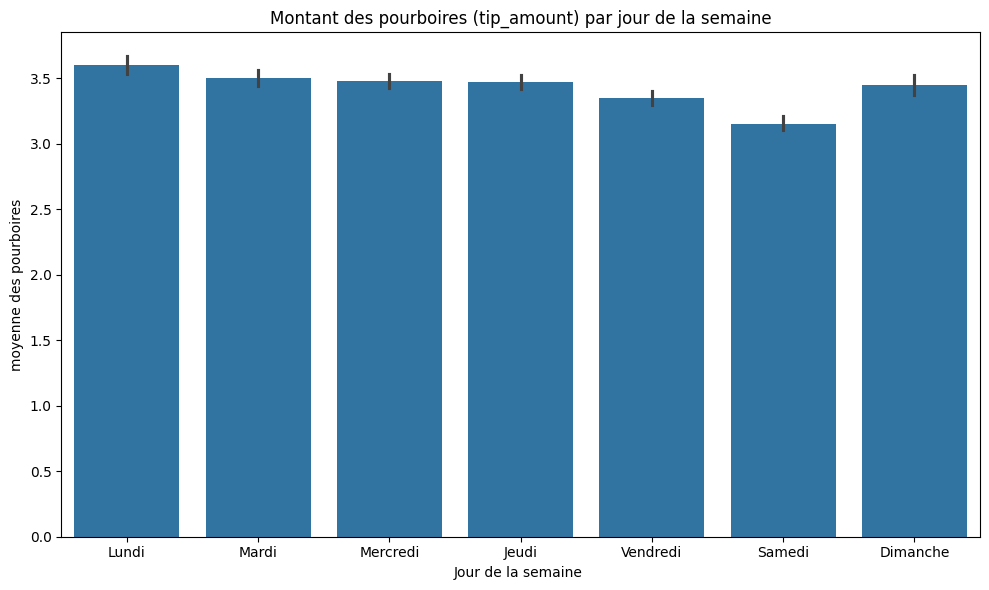

In [75]:
# Créer un barplot de 'tip_amount' en fonction de 'jour'
plt.figure(figsize=(10, 6))
sns.barplot(data=data_train, x='Jour', y='tip_amount', estimator= 'mean' )

# Ajouter un titre et des labels
plt.title('Montant des pourboires (tip_amount) par jour de la semaine')
plt.xlabel('Jour de la semaine ')
plt.ylabel('moyenne des pourboires')

# Afficher les noms des jours au lieu des numéros (si souhaité)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])

# Afficher le graphique
plt.tight_layout()
plt.show()

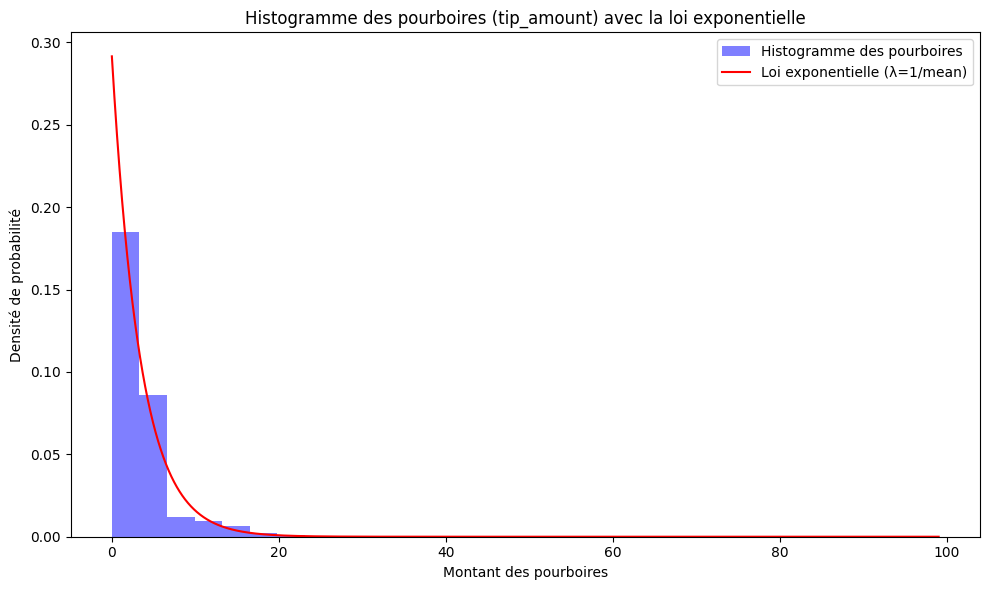

In [111]:
# Calculer la moyenne des pourboires
mean_tip_amount = data_train['tip_amount'].mean()

# Créer l'histogramme des pourboires en termes de probabilité
plt.figure(figsize=(10, 6))
plt.hist(data_train['tip_amount'], bins=30, density=True, alpha=0.5, color='blue', label='Histogramme des pourboires')

# Créer des valeurs x pour la courbe exponentielle
x = np.linspace(0, data_train['tip_amount'].max(), 10000)

# Définir la fonction de densité de la loi exponentielle
lambda_param = 1/ mean_tip_amount  # Paramètre de la loi exponentielle
pdf_exponential = lambda_param * np.exp(-lambda_param * x)  # Densité de probabilité

# Superposer la courbe exponentielle sur l'histogramme
plt.plot(x, pdf_exponential, color='red', label='Loi exponentielle (λ=1/mean)')

# Ajouter un titre et des labels
plt.title('Histogramme des pourboires (tip_amount) avec la loi exponentielle')
plt.xlabel('Montant des pourboires')
plt.ylabel('Densité de probabilité')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()

In [86]:
from scipy import stats

In [87]:
# Supposons que data_train contient la colonne 'tip_amount'
tip_amounts = data_train['tip_amount']

# Calculer la moyenne pour déterminer le paramètre lambda
mean_tip_amount = np.mean(tip_amounts)
lambda_param = 1 / mean_tip_amount

# Effectuer le test de Kolmogorov-Smirnov
# stats.kstest prend comme paramètre 'cdf' qui est la fonction de distribution cumulative
ks_statistic, p_value = stats.kstest(tip_amounts, 'expon', args=(0, 1/lambda_param))

# Afficher les résultats
print(f"Statistique K-S: {ks_statistic}")
print(f"P-value: {p_value}")

# Interpréter les résultats
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("On rejette l'hypothèse nulle : les données ne suivent pas une loi exponentielle.")
else:
    print("On ne peut pas rejeter l'hypothèse nulle : les données pourraient suivre une loi exponentielle.")

Statistique K-S: 0.20399
P-value: 0.0
On rejette l'hypothèse nulle : les données ne suivent pas une loi exponentielle.


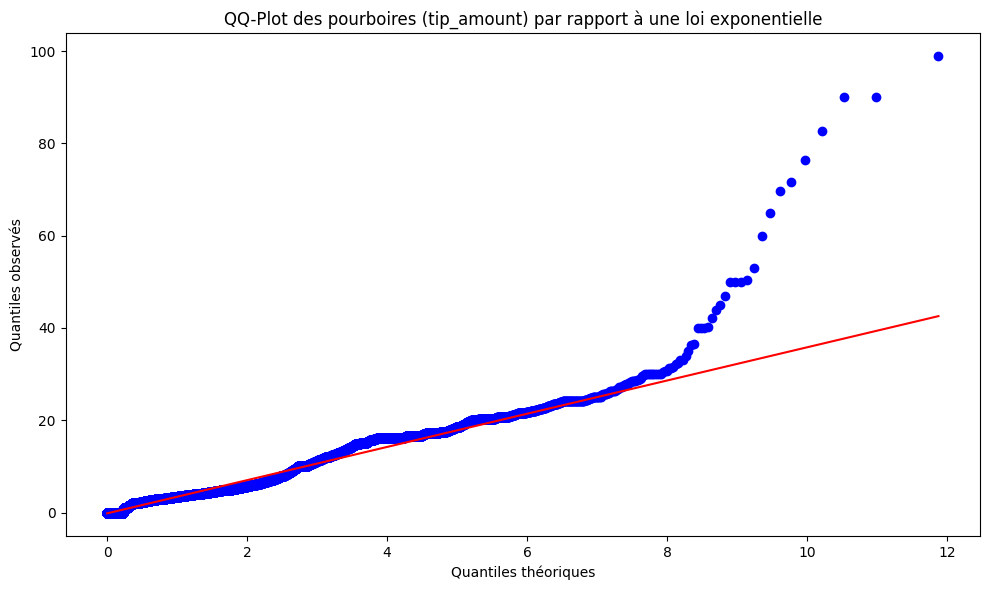

In [88]:
plt.figure(figsize=(10, 6))
stats.probplot(tip_amounts, dist="expon", plot=plt)
plt.title('QQ-Plot des pourboires (tip_amount) par rapport à une loi exponentielle')
plt.xlabel('Quantiles théoriques')
plt.ylabel('Quantiles observés')

# Afficher le graphique
plt.tight_layout()
plt.show()

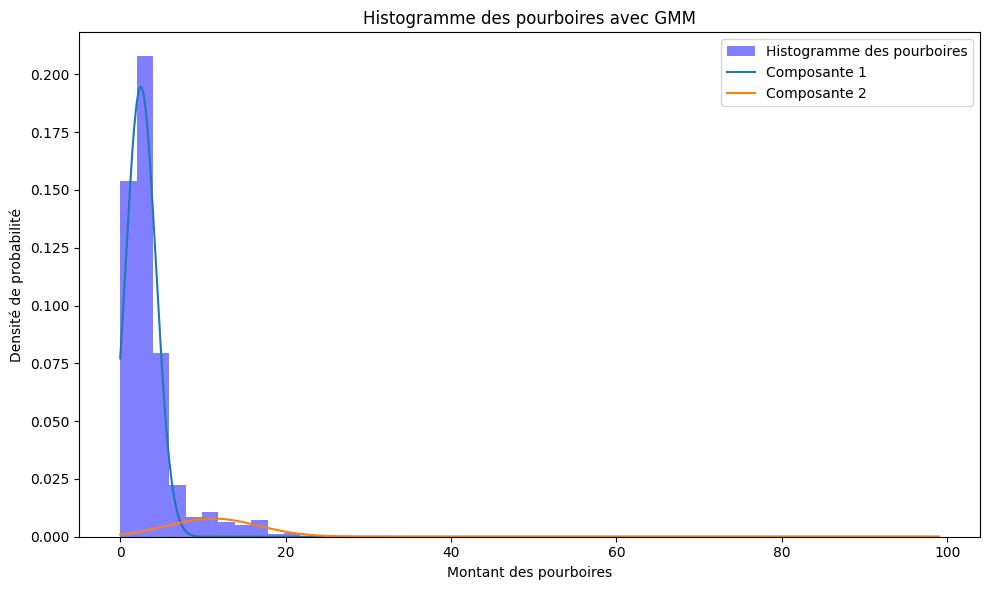

In [107]:
from sklearn.mixture import GaussianMixture

# Supposons que data_train contient la colonne 'tip_amount'
tip_amounts = data_train['tip_amount'].values.reshape(-1, 1)  # Reshape pour GMM

# Appliquer un GMM avec 2 composantes (vous pouvez ajuster le nombre)
n_components = 2
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(tip_amounts)

# Prédire les labels des clusters
labels = gmm.predict(tip_amounts)

# Obtenir les paramètres des composantes
means = gmm.means_.flatten()
covariances = gmm.covariances_.flatten()
weights = gmm.weights_

# Créer l'histogramme des pourboires
plt.figure(figsize=(10, 6))
plt.hist(tip_amounts, bins=50, density=True, alpha=0.5, color='blue', label='Histogramme des pourboires')

# Tracer les composantes gaussiennes
x = np.linspace(0, tip_amounts.max(), 1000).reshape(-1, 1)
for i in range(n_components):
    plt.plot(x, weights[i] * (1 / np.sqrt(2 * np.pi * covariances[i])) *
             np.exp(-0.5 * ((x - means[i]) ** 2) / covariances[i]), 
             label=f'Composante {i+1}')

# Ajouter un titre et des labels
plt.title('Histogramme des pourboires avec GMM')
plt.xlabel('Montant des pourboires')
plt.ylabel('Densité de probabilité')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()